## Price Predictor 

In [1]:
import sklearn
import numpy as np

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("housing_data.csv")
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285611,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704852,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plotting Histogrmas

In [7]:
%matplotlib inline 

In [8]:
import matplotlib.pyplot as plt

In [9]:
# housing.hist(bins=50, figsize = (20 , 15))

## Train-Test Split
        # by writing function
        # by importing function

### Train Test Split through sklearn

In [10]:
def split_train_test(data , test_ratio):
    np.random.seed(42) # to fix random values
    shuffled = np.random.permutation(len(data))
    #print(shuffled)
    test_set_size = int(len(data) *test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]
    

In [11]:
test_set , train_set = split_train_test(housing , 0.2)

In [12]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [13]:
print("Rows in train set :", len(train_set))
print("Rows in test set :", len(test_set))

Rows in train set : 405
Rows in test set : 101


### Train Test Split through sklearn

In [14]:
from sklearn.model_selection import train_test_split
train_Set , test_Set = train_test_split(housing , test_size =0.2 , random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



#### For Stratiffied Sampling - for equal distribution ratio on catigorical variable,CHAS

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(housing , housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### To make a copy of dataset

In [16]:
housing_train = strat_train_set.copy()
housing_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [17]:
housing_train.shape

(404, 14)

In [18]:
strat_test_set['CHAS'].value_counts() #95/7 

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
strat_train_set['CHAS'].value_counts()    #376/28

0    376
1     28
Name: CHAS, dtype: int64

## To deal with Missing Attributes

### if we want to getrid of missing values

In [48]:
a = housing.dropna(subset=['RM'])
a.shape

(501, 14)

### if we want to getrid of the column with missing values

In [49]:
b = housing_train.drop("RM" , axis = 1)  #column = axis --> 1
b.shape

(404, 14)

### To fill median value inplace of missing values

In [50]:
median = housing_train['RM'].median()
housing['RM'].fillna(median)


0      6.575
1      6.421
2      7.185
3      6.216
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [51]:
housing.shape

(506, 14)

### Correlation

In [52]:
corr_matrix = housing_train.corr() # if MEDV (price) if increasees other value will increase or decrese.
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.678835
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528883
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>]], dtype=object)

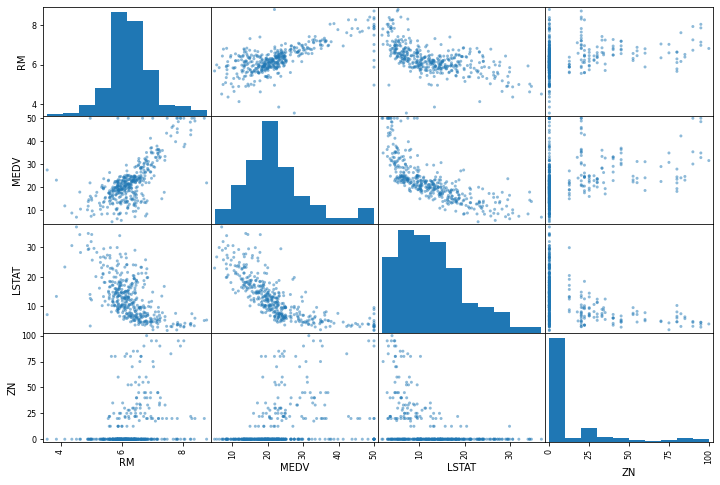

In [24]:
from pandas.plotting import scatter_matrix
attributes = ['RM', 'MEDV', "LSTAT", 'ZN']
scatter_matrix(housing_train[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

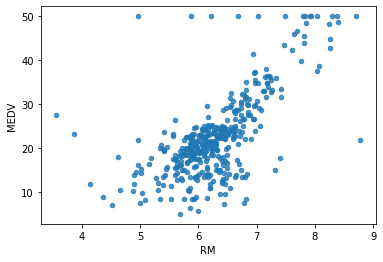

In [25]:
housing_train.plot(kind = 'scatter', x = 'RM' , y = 'MEDV' , alpha = 0.8) #alpha is for color of plot

## Combination of Attributes

In [26]:
# housing_train['TAXRM']= housing_train['TAX']/housing_train['RM']

In [27]:
# housing_train['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [28]:
corr_matrix = housing_train.corr() # if MEDV (price) if increasees other value will increase or decrese.
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.678835
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528883
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

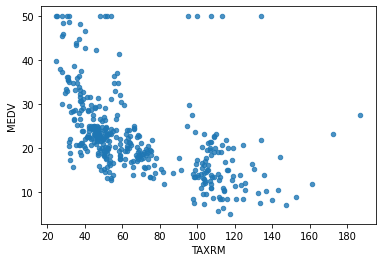

In [29]:
housing_train.plot(kind = 'scatter', x = 'TAXRM' , y = 'MEDV' , alpha = 0.8) #alpha is for color of plot

In [30]:
housing_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281075,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.773644
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715886,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.532971
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.229977
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [31]:
housing_train.shape

(404, 15)

In [32]:
# to divide in features and lables 
housing_features = housing_train.drop("MEDV", axis =1)
housing_labels = housing_train['MEDV']

## To deal with missing values automaticaly 

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing_train)
imputer.statistics_
X = imputer.transform(housing_train)
housing_tr = pd.DataFrame(X, columns = housing_train.columns)

In [34]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280270,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.618400
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711467,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.367494
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.229977
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


## Feature Scaling

1- Min max scaling (Normalization) --> (value - min)/(max - min)
        MinMaxScaler
2- Standardization
        (value - mean)/std     --> StandardScaler

## Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'median')),
    ('std_scaler' , StandardScaler()),
    
])


In [36]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [37]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.86091034,
        -0.06501087, -0.51220502],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.94116739,
         0.21235476, -0.81133242],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81480158,
        -0.61974213,  1.12025176],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -1.27603303,
         2.27126115, -1.03178032],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.73869575,
        -0.89710776,  1.09965054],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.09940681,
         0.08433985, -0.66212242]])

## To fit a model on data 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
model = LinearRegression()
# model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels , housing_predictions)
rmse = np.sqrt(mse)

In [40]:
mse

6.085593253539381e-28

In [41]:
# Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr , housing_labels , scoring ='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [42]:
rmse_scores

array([3.52027316e-14, 2.13530294e-14, 4.25067359e-14, 2.18783744e-14,
       3.40069123e-14])

In [43]:
def print_scores(scores):
    print('Scores:' , scores)
    print('Mean:' , scores.mean())
    print('Standard deviation: ', scores.std())

In [44]:
print_scores(rmse_scores)

Scores: [3.52027316e-14 2.13530294e-14 4.25067359e-14 2.18783744e-14
 3.40069123e-14]
Mean: 3.098955672755982e-14
Standard deviation:  8.189957217643544e-15


# Testing the model on test data 

In [46]:
X_test = strat_test_set.drop('MEDV', axis = 1)
Y_test = strat_test_set['MEDV'].copy()
_test_prepared = my_pipeline.transform(X_test)
final_prediction = mdel.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

ValueError: X has 13 features, but SimpleImputer is expecting 15 features as input.